# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

##  Откройте файл с данными и изучите общую информацию. 

In [76]:
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(5))
print('Количество строк и столбцов в исходной базе')
data.shape

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Количество строк и столбцов в исходной базе


(23699, 22)

In [77]:
print('Общая информация о  таблице')
data.info()

Общая информация о  таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  obje

Построим общую гистограмму для всех числовых столбцов таблицы.


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

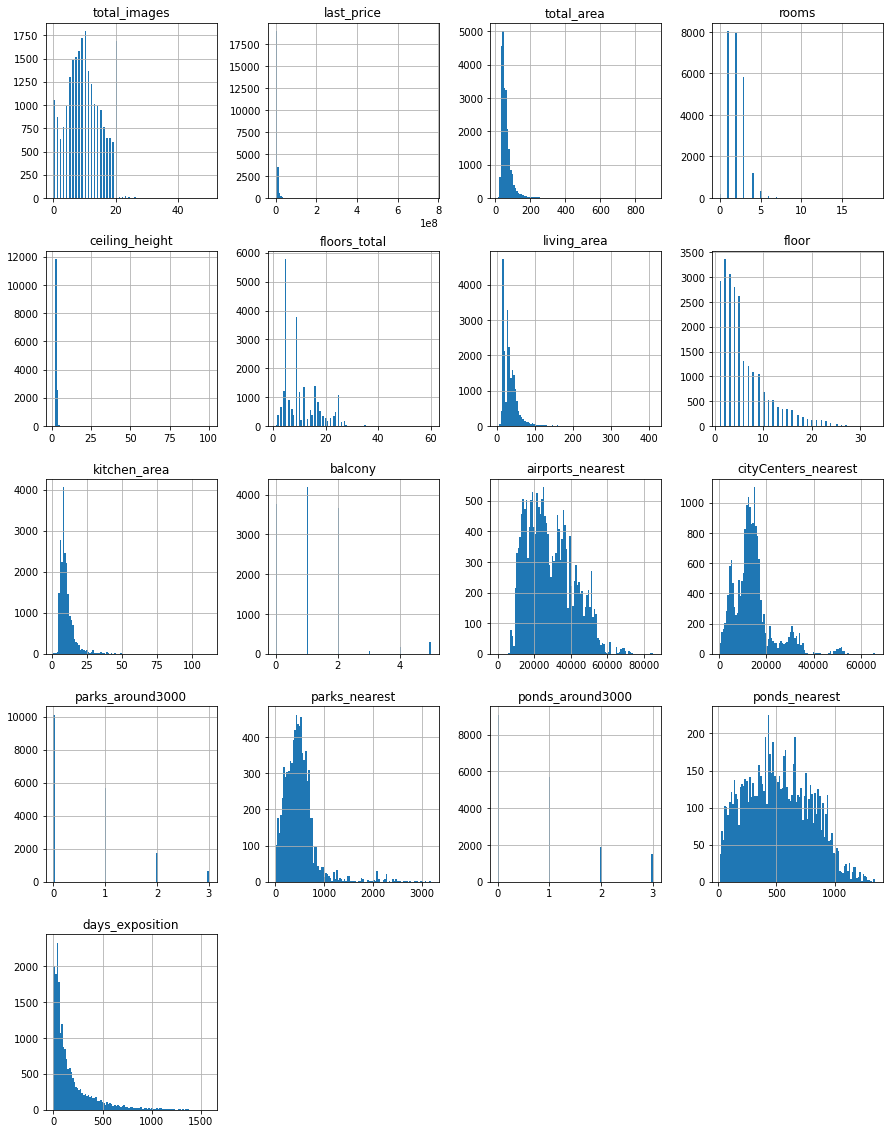

In [78]:
data.hist(bins=100, figsize=(15, 20))

##  Предобработка данных

###  Выведем количество пропущенных значений для каждого столбца. :
(всего строк 23700)

In [79]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Высота потолка -№5- ceiling_height   -     14504 


In [80]:
print('пропущено значений:')
print(23699-14504) 
print(9195/23700)


пропущено значений:
9195
0.3879746835443038


In [81]:
display(data['ceiling_height'].value_counts())
display(data['ceiling_height'].value_counts().head(10))

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
2.55     980
2.75     910
2.65     676
3.20     277
3.10     203
Name: ceiling_height, dtype: int64

In [94]:
#display(data[data['ceiling_height'].isna()])

Пропущено значительное количество, около 40%, значений высоты потолка.  Из практики  и из данных видно , что основные высоты потолков, это: 
2,5 - хрущевка,
2,70 - многоэтажные дома, 
3- сталинские и "царские" дома. В принциппе можно добавить эти данные в таблицу, но пока не будем этого делать. 

#### Балконы №13 - balcony-   12180 non-null  float64

In [83]:
print('пропущено значений:')
print(23699-12180) 
print((23699-12180)/23700)

пропущено значений:
11519
0.4860337552742616


In [84]:
display(data['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [86]:
#display(data[data['balcony'].isna()])

In [11]:
len(data[data['balcony'].isna()])

11519

Поскольку пропущенные значения о балконах никак не влияют на цели нашей работы, то мы не исправляем эти данные. 

#### Аппартаменты -№9  - is_apartment -         2775

In [87]:
display(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64

In [89]:
#display(data[data['is_apartment'].isna()])

In [14]:
len(data[data['is_apartment'].isna()])

20924

Около 85% данных о том является ли студия апрпартаментом , или не является не заполненно. Отмечу что в таблице 0,2% объектов 
являются аппартаментами, 11,5% не являются. Доля в 0.2% статистически не значима, этот столбец можно было бы и удалить,Но посколько в дальнейшем анализе его значения не используются , оставляем как есть.    

### Преобразование типов данных

In [15]:
#data['floors_total'] = data['floors_total'].astype('int')

Поменяем тип данных столбца 'first_day_exposition' на datetime64[ns] чтобы применять к значениям столбца dt-методы. 

In [90]:
data['first_day_exposition'] = data['first_day_exposition'].astype("datetime64[ns]")

### Неявные дупликаты

Выведем все значения наименований населенных пунктов. 

In [17]:
display(data['locality_name'].sort_values().unique())
len(data['locality_name'].sort_values().unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

365

In [18]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')
display(data['locality_name'].sort_values().unique())
len(data['locality_name'].sort_values().unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

321

Мы убрали дублирующие названия, было 365, стало 321 названий населенных пунктов.  

### Редкие и выбивающиеся значения

In [19]:
#выведем строки с потолками выше 10 метров.
data[data['ceiling_height'] > 10]['ceiling_height'].value_counts()

27.0     8
25.0     7
32.0     2
14.0     1
20.0     1
24.0     1
27.5     1
10.3     1
22.6     1
26.0     1
100.0    1
Name: ceiling_height, dtype: int64

    Посмотрим есть ли потолки выше 10 метров. Да. Такие данные есть. Потолки высотой от 20 метров до 50 метров могут быть неправильно внесены пользователями, которые ошибочно  вместо 2,5 м внесли 25 метров. 
    Исправим эти данные , поделив их на 10. 

In [20]:
data.loc[data['ceiling_height']>=20, 'ceiling_height']=data.loc[data['ceiling_height']>=20, 'ceiling_height']/10
data[data['ceiling_height'] > 10]['ceiling_height'].value_counts()

14.0    1
10.3    1
Name: ceiling_height, dtype: int64

Посмотрим нет ли слишком больших квартир, посмотрим на квартиры площади большей чем 400 кв. м. . Самая гигантская квартира 900 кв.м, перед ней 631, и 618 кв.м. В принципе такие эксклюзивные квартиры в Петербурге возможны, оставим эти данные.

In [21]:
data[data['total_area'] > 400]['total_area'].value_counts()

500.00    2
460.80    1
590.00    1
422.20    1
495.00    1
618.00    1
900.00    1
517.00    1
488.00    1
483.90    1
631.20    1
491.00    1
494.10    1
402.00    1
413.50    1
470.30    1
631.00    1
401.00    1
410.00    1
507.00    1
441.98    1
431.00    1
Name: total_area, dtype: int64

In [91]:
#отфильтруем объекты с общей площадью меньше 15 кв.м.
data[data['total_area'] <15]['total_area'].value_counts()

13.0    3
14.0    1
12.0    1
13.2    1
Name: total_area, dtype: int64

Минимальные размеры квартир допустимы. Оставим все как есть.

Удалим из базы обьекты стоимостью менее 1 млн рублей, как нерелевантные. 

In [92]:
data=data[data['last_price'] > 1000000]

In [93]:
data.shape

(23454, 22)

## Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу столбец с ценой за квадратный метр, mm_price.

In [25]:
data['mm_price']=(data['last_price']/data['total_area']).round()
#display(data.head(5))

Добавим в таблицу день недели,  месяц и год появления обьявления.

In [26]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
#display(data)

Добавим в таблицу тип этажа. 

In [27]:
#Создадим функцию типизации этажа 
def floor_type (row):
    goal = row['floor']
    if  goal == 1:
        return 'первый'
    if goal == row['floors_total']:
        return 'последний'
    return 'другой'

#Применим функцию 

data['floor_type'] = data.apply(floor_type, axis=1)      
#display(data.head(6))

Добавим в таблицу расстояние до центра города в км.

In [28]:
data['cityCenters_km'] = (data['cityCenters_nearest']/1000).round()
display(data.head(6))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mm_price,weekday,year,month,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,NaN,120370.0,3,2019,3,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,0.0,NaN,81.0,82921.0,1,2018,12,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558.0,92786.0,3,2015,8,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,84.0,3.0,234.0,424.0,408176.0,4,2015,7,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000.0,1,2018,6,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,55.0,95066.0,0,2018,9,другой,NaN


## Проведите исследовательский анализ данных

### Изучим отдельные параметры объектов.

#### Общая площадь квартир.

<AxesSubplot:>

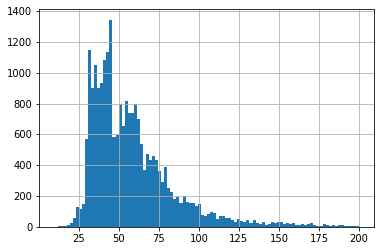

In [29]:
data['total_area'].hist(bins=100, range=(10,200))

<AxesSubplot:>

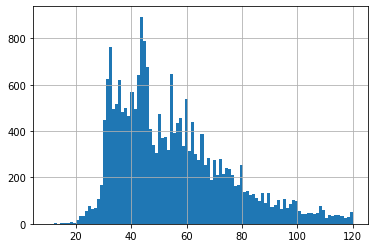

In [30]:
data['total_area'].hist(bins=100, range=(10,120))

In [31]:
data['total_area'].describe()

count    23454.000000
mean        60.543132
std         35.767917
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

 Вывод: Ожидаемое распределение общей площади квартир — гистограмма с длинным хвостом на высоких значениях(от 90 до 200 кв.м.) и падением в ноль слева от пика, не доходя до нуля в районе 20 кв.м..   
    Основная масса квартир находится в диапозоне от 30 до 90 квадратных метров. Мы видим отдельные пики общих площадей - 30,32,36,41,45,51,56, 64 и т.д квадратных метров, это следствие типовых стандартных квартир. 
    Медианное значение 52 кв.м. Первый квартиль 40 кв.м, третий-70 кв.м.

#### Жилая площадь квартир.

<AxesSubplot:>

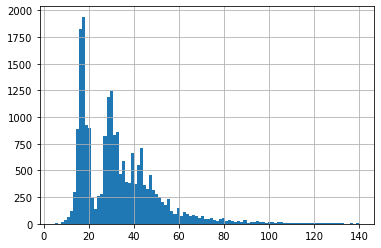

In [32]:
data['living_area'].hist(bins=100, range=(5,140))

<AxesSubplot:>

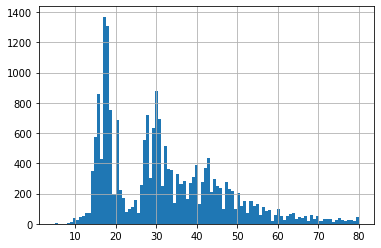

In [33]:
data['living_area'].hist(bins=100, range=(5,80))

In [34]:
data['living_area'].describe()

count    21596.000000
mean        34.539511
std         22.097985
min          2.000000
25%         18.600000
50%         30.000000
75%         42.500000
max        409.700000
Name: living_area, dtype: float64

    Вывод: Ожидаемое распределение жилой площади квартир  — гистограмма с длинным хвостом на высоких значениях(от 60 до 120 кв.м.) и падением в ноль слева от пика, не доходя до нуля в районе 10 кв.м..   
    Медианное значение 30 кв.м., первый квартиль 18,6 , третий 42,3 кв. м. соответствует пропорциям в распределении общей площади. Стандартные значения: большая однушка - общ.40, жил. 18-20 , большая двушка - общая 50, жилая 30, трешка общая 70, жилая 42. метра.
    Непонятен сильный провал в распределении жилой площади между 22 и 26 кв.м.    

#### Площадь кухни.

<AxesSubplot:>

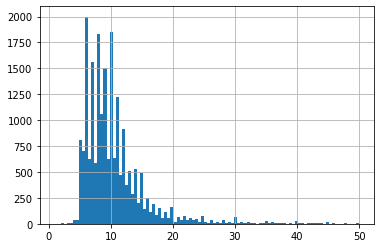

In [35]:
data['kitchen_area'].hist(bins=100, range=(1,50))

<AxesSubplot:>

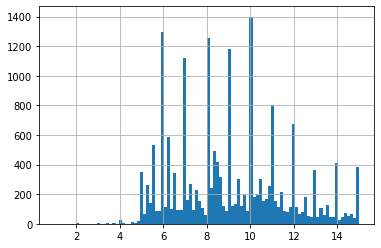

In [36]:
data['kitchen_area'].hist(bins=100, range=(1,15))

In [37]:
data['kitchen_area'].describe()

count    21224.000000
mean        10.602117
std          5.916813
min          1.300000
25%          7.000000
50%          9.200000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Вывод: Ожидаемое распределение площади кухни — гистограмма с коротким хвостом на значениях от 18 до 30 кв.м. и падением в ноль слева от пика, не доходя до нуля в районе 5 кв.м..   
Медианное значение 9,1 кв.м., первый квартиль 7 , третий 12 кв. м..
Видны пики размеров кухонь на массовых застройках 6 кв.м, 6.5, 8,9,10,11,12. И некоторые люди округляют размер кухни до целого, отпуская десятичную часть.

#### Цена квартиры.

<AxesSubplot:>

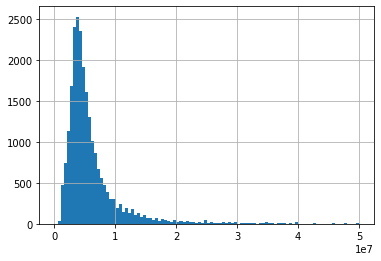

In [38]:
data['last_price'].hist(bins=100, range=(100000,50000000))

<AxesSubplot:>

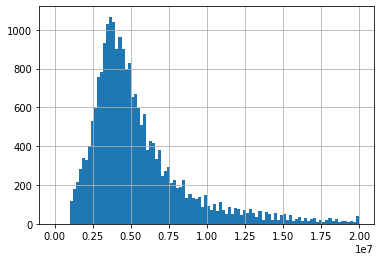

In [39]:
data['last_price'].hist(bins=100, range=(0,20000000))

In [40]:
data['last_price'].describe()

count    2.345400e+04
mean     6.601659e+06
std      1.092774e+07
min      1.010000e+06
25%      3.480000e+06
50%      4.670000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [41]:
data[data['last_price'] < 1000000].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mm_price,weekday,year,month,floor_type,cityCenters_km


    Вывод: Распределение цен квартир нормальное с  длинным хвостом на значениях от 9 до 50 млн. рублей. 
    Медианное значение 4,7 млн. руб., первый квартиль 3,5 млн. руб. , третий 6,8 млн.руб. Средняя цена 6.6 млн рублей.
    Есть большое количество данных с неестественно низким значением цены за объект. Предлагаю убрать все объекты стоимостью менее 1 млн. рублей. Удаление произведу в разделе 2.  

#### Количество комнат.


<AxesSubplot:>

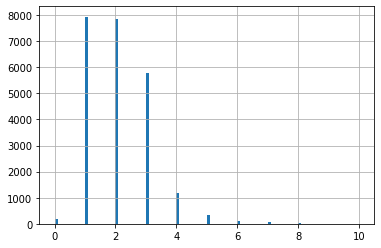

In [42]:
data['rooms'].hist(bins=100, range=(0,10))

In [43]:
data['rooms'].describe()

count    23454.000000
mean         2.074699
std          1.080780
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

    Вывод: Распределение представляет столбчатый график. Больше всего одно  и двухкомнатных квартир, около 8 тысяч. Ттрехкомнатных около 5,8 тысяч квартир. Третий квартиль - трехкомнатные квартиры, т.е. 1,2,3-х комнатные квартиры составляют 75% всех квартир.


#### Высота потолков.


<AxesSubplot:>

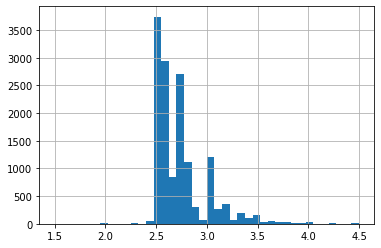

In [44]:
data['ceiling_height'].hist(bins=40, range=(1.5,4.5))

In [45]:
data[data['ceiling_height']<2.3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mm_price,weekday,year,month,floor_type,cityCenters_km
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.500000,6,NaN,...,520.0,1.0,949.0,270.0,89522.0,3,2017,3,другой,12.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.000000,4,NaN,...,NaN,NaN,NaN,NaN,38710.0,3,2018,12,другой,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.600000,9,NaN,...,NaN,NaN,NaN,36.0,59836.0,0,2017,12,другой,NaN
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.500000,1,NaN,...,NaN,NaN,NaN,248.0,35047.0,0,2017,8,первый,NaN
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,NaN,100.0,46479.0,1,2018,5,последний,NaN
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.200000,12,NaN,...,NaN,0.0,NaN,53.0,91667.0,6,2017,6,другой,27.0
12755,2,1400000.0,22.50,2017-09-21,1,2.20,2.0,18.000000,2,NaN,...,NaN,NaN,NaN,45.0,62222.0,3,2017,9,последний,NaN
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5.0,63.900000,2,NaN,...,568.0,1.0,154.0,NaN,139298.0,1,2019,3,другой,8.0
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5.0,20.000000,5,False,...,NaN,NaN,NaN,6.0,45455.0,2,2018,10,последний,NaN
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37.0,17.400000,5,NaN,...,NaN,3.0,80.0,71.0,102500.0,1,2017,10,другой,20.0


Построим гистограмму высоты потолков. Пики значений 2.5, 2.6 метра - хрущевка, 2.7 - многоэтажные дома,
3-3.20 - сталинские и "царские" дома.  


#### Этаж квартиры.


<AxesSubplot:>

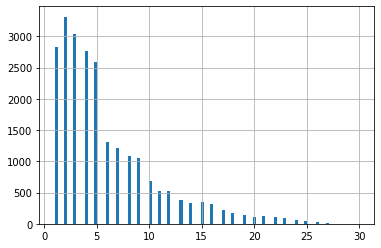

In [46]:
data['floor'].hist(bins=100, range=(1,30))

In [47]:
data['floor'].describe()

count    23454.000000
mean         5.925514
std          4.895056
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


#### Тип этажа квартиры («первый», «последний», «другой»).


<AxesSubplot:>

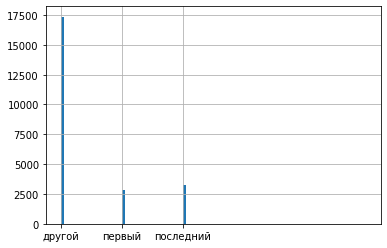

In [48]:
data['floor_type'].hist(bins=100, range=(0,5))

Первых и последних этажей в продаже около 10%, других около 80%. 

#### Общее количество этажей в доме.


<AxesSubplot:>

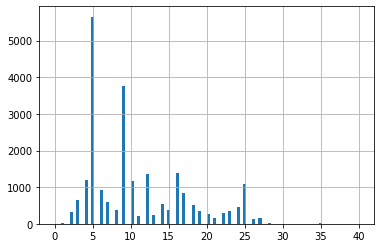

In [49]:
data['floors_total'].hist(bins=100, range=(0,40))

In [50]:
data['floors_total'].describe()

count    23368.000000
mean        10.742383
std          6.594001
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Больше всего в городе 5 этажных домов, около 5.8 тысяч. И много девятиэтажек, около 3.8 тысячи. 

#### Расстояние до центра города в метрах.

<AxesSubplot:>

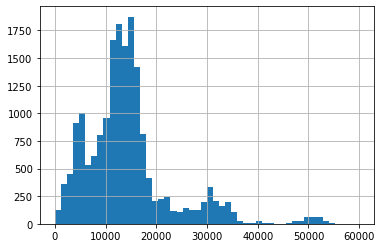

In [51]:
data['cityCenters_nearest'].hist(bins=50, range=(0,60000))

In [52]:
data['cityCenters_nearest'].describe()

count    18179.000000
mean     14191.553716
std       8608.542615
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Из данной гистограммы мы видим пики распределения на расстоянии 5-6 км и 12-16 км. Пики на расстоянии 22 км, 32 км, 52 км могут означать наличие в базе объектов из  достаточно крупных городов и поселков в Ленобласти. 

#### Расстояние до ближайшего аэропорта.

<AxesSubplot:>

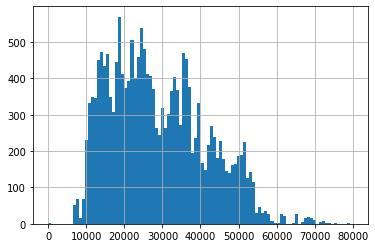

In [53]:
data['airports_nearest'].hist(bins=100, range=(0,80000))

In [54]:
data['airports_nearest'].describe()

count    18156.000000
mean     28793.252093
std      12631.101627
min          0.000000
25%      18584.250000
50%      26726.000000
75%      37273.500000
max      84869.000000
Name: airports_nearest, dtype: float64

Расстояние до аэропорта имеет нормальное распределение со средним хвостом. 
Первый квартиль-18 км, медиана-26 км, третий квартиль -37 км. 

#### Расстояние до ближайшего парка.

<AxesSubplot:>

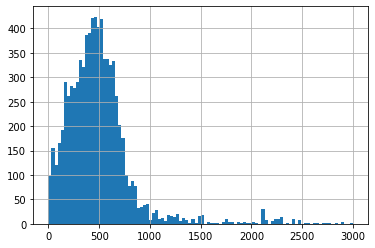

In [55]:
data['parks_nearest'].hist(bins=100, range=(0,3000))

In [56]:
data['parks_nearest'].describe()

count    8078.000000
mean      490.765660
std       342.321331
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Вывод: Распределение расстояние нормальное с средним хвостом от 900 до 3000 метров. 
Медианное значение 455 метра, третий квартиль 612 метра.
В Петербурге большое количество парков рядом с домом! 

#### День, месяц и год публикации объявления.

<AxesSubplot:>

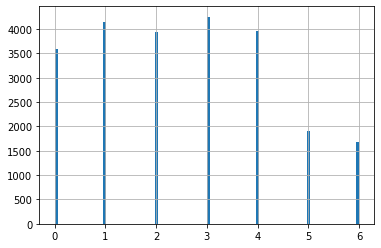

In [57]:
data['weekday'].hist(bins=100, range=(0,6))

Люди больше размещают данные о продаже квартир в рабочие дни , в выходные количество размещений в два раза реже.

<AxesSubplot:>

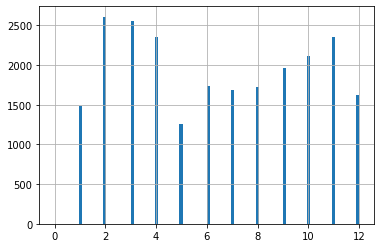

In [58]:
data['month'].hist(bins=100, range=(0,12))

Меньше всего размещения обьявлений в январе и мае, наверное  из-за большого количества выходных дней. Чаще всего размещают -февраль,март, апрель и осенью-сентябрь,октябрь,ноябрь.  

<AxesSubplot:>

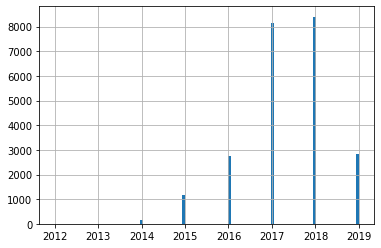

In [59]:
data['year'].hist(bins=100, range=(2012,2019))

В нашей базе данные с 2014 по 2019 год. 

### Быстрота продажи квартир (столбец days_exposition).

<AxesSubplot:>

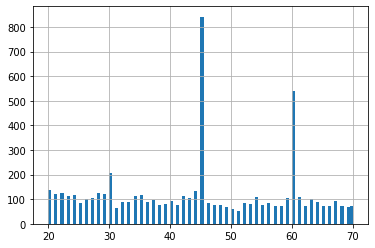

In [60]:
#построим гистограмму времени экспозиции квартиры за 70 дней
data['days_exposition'].hist(bins=100, range=(20,70))

<AxesSubplot:>

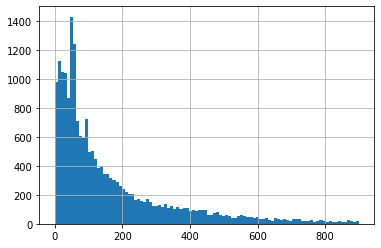

In [61]:
#построим гистограмму времени экспозиции квартиры за 900 дней
data['days_exposition'].hist(bins=100, range=(0,900))

In [62]:
data['days_exposition'].describe()

count    20324.000000
mean       181.121925
std        220.090511
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Гистограмма времени экспозиции напоминает распределение Пуассона. Четверть всех квартир продается за 45 дней, медианное время экспозиции 95 дней,75% всех квартир продаются за 232 дня.
Быстрыми продажами можно назвать продажи за 1 месяц.
Долгими продажами я бы назвал продажи свыше 8 месяцев. Необычно долгие -это продажи свыше двух лет. 
Непонятны всплески продаж на 45 и 60 день экспозиции.  

### Влияние различных факторов на общую (полную) стоимость объекта.

Изучим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
типа этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

In [63]:
#создадим таблицу из пяти столбцов:полной цены,общей площади,жилой площади,площади кухни,количества комнат;
data_mm = data.loc[:, ['last_price', 'total_area','living_area','kitchen_area','rooms']]
#построим матрицу корреляции
data_mm.corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.653053,0.566133,0.518893,0.362945
total_area,0.653053,1.000000,0.939677,0.608316,0.758285
living_area,0.566133,0.939677,1.000000,0.428121,0.845983
kitchen_area,0.518893,0.608316,0.428121,1.000000,0.269376
rooms,0.362945,0.758285,0.845983,0.269376,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

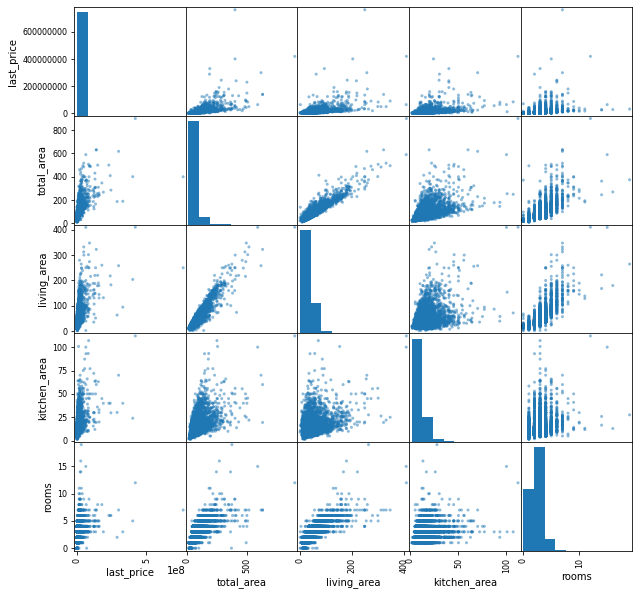

In [64]:
#построим матрицу рассеяния
pd.plotting.scatter_matrix(data_mm, figsize=(10, 10))

Как и предполагалось чем больше квартира тем больше она стоит, corr=0.63;
коэффициент корреляции полной стоимости и жилой площади меньше, corr=0,57;
также есть зависимость от размера кухни, corr=0,52 и количества комнат corr=0.36. Неочевидный факт что полная стоимость квартиры больше зависит от размера кухни, чем от количества комнат!  

In [65]:
#построим таблицу с твумя столбцами:полной ценой и типом этажа
data_fltype = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
#data_fltype = data.loc[:,['last_price','floor_type']]
data_fltype.head(5)

,last_price
floor_type,
другой,4850000.0
первый,3950067.0
последний,4390000.0


<AxesSubplot:xlabel='floor_type'>

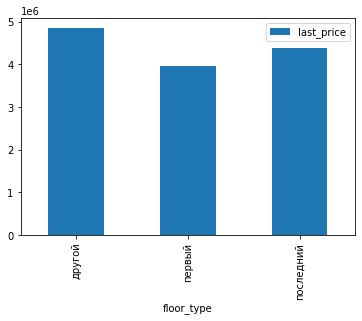

In [66]:
data_fltype.plot.bar( )

Выводы. Первый этаж самый дешевый, приблизительно на 10% дешевле последнего. Последний этаж дешевле 'другого' приблизительно на 15%. 

In [67]:
#создадим таблицу из пяти столбцов:полной цены,дня недели,месяца,года публикации;
data_dmy = data.loc[:,['last_price', 'weekday','month','year']]
#data_dmy
#построим матрицу корреляции
data_dmy.corr()

,last_price,weekday,month,year
last_price,1.000000,0.002568,0.002227,-0.042181
weekday,0.002568,1.000000,0.012489,-0.004677
month,0.002227,0.012489,1.000000,-0.270018
year,-0.042181,-0.004677,-0.270018,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='weekday', ylabel='last_price'>,
        <AxesSubplot:xlabel='month', ylabel='last_price'>,
        <AxesSubplot:xlabel='year', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='weekday'>,
        <AxesSubplot:xlabel='weekday', ylabel='weekday'>,
        <AxesSubplot:xlabel='month', ylabel='weekday'>,
        <AxesSubplot:xlabel='year', ylabel='weekday'>],
       [<AxesSubplot:xlabel='last_price', ylabel='month'>,
        <AxesSubplot:xlabel='weekday', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>],
       [<AxesSubplot:xlabel='last_price', ylabel='year'>,
        <AxesSubplot:xlabel='weekday', ylabel='year'>,
        <AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

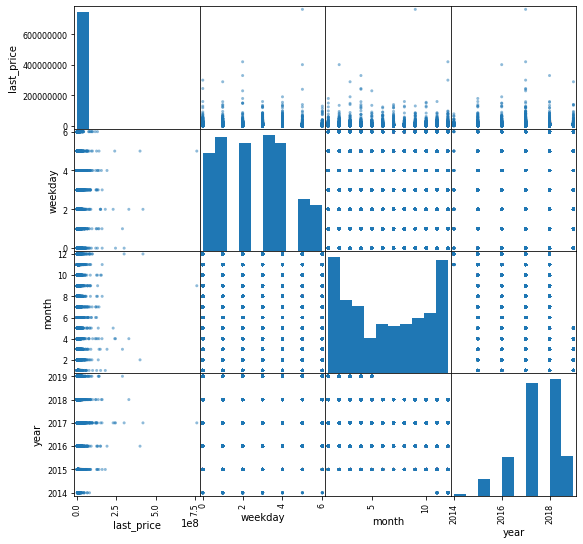

In [68]:
#построим матрицу рассеяния
pd.plotting.scatter_matrix(data_dmy, figsize=(9, 9))

Зависимости полной цены объекта от дня недели, месяца и года публикации нет. 

###  Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [69]:
#создадим таблицу сгрупированную по населенным пунктам, посчитаем среднюю цену за метр и количество объектов 
data_poselok = data.pivot_table(index='locality_name', values='mm_price', aggfunc=['mean','count'])
data_poselok
#data_poselok.sort_values(by='mm_price',ascending=False ).head(11)


,mean,count
,mm_price,mm_price
locality_name,,
Бокситогорск,19600.500000,2
Волосово,40183.305556,36
Волхов,35206.841121,107
Всеволожск,68719.287154,397
Выборг,58685.678112,233
...,...,...
село Путилово,39921.500000,2
село Рождествено,37733.000000,3


In [70]:
#переименуем столбцы
data_poselok.columns = ['mean', 'count']
#упорядочим по количеству объектов в населенном пункте
data_poselok.sort_values(by='count',ascending=False ).head(12)

,mean,count
locality_name,,
Санкт-Петербург,114856.304580,15720
поселок Мурино,85681.758993,556
поселок Шушары,78677.379545,440
Всеволожск,68719.287154,397
Пушкин,103125.818428,369
Колпино,75424.571006,338
поселок Парголово,90175.886850,327
Гатчина,68935.160131,306
деревня Кудрово,92473.588629,299


In [71]:
#уберем из таблицы петербург и оставим 10 населенных пунктов с бОльшим количеством вариантов
data_poselok = data_poselok[(190 < data_poselok['count']) &(data_poselok['count'] < 1000) ]
data_poselok.sort_values(by='mean',ascending=False )

,mean,count
locality_name,,
Пушкин,103125.818428,369
деревня Кудрово,92473.588629,299
поселок Парголово,90175.886850,327
поселок Мурино,85681.758993,556
Петергоф,84757.532338,201
поселок Шушары,78677.379545,440
Колпино,75424.571006,338
Гатчина,68935.160131,306
Всеволожск,68719.287154,397


<AxesSubplot:xlabel='locality_name'>

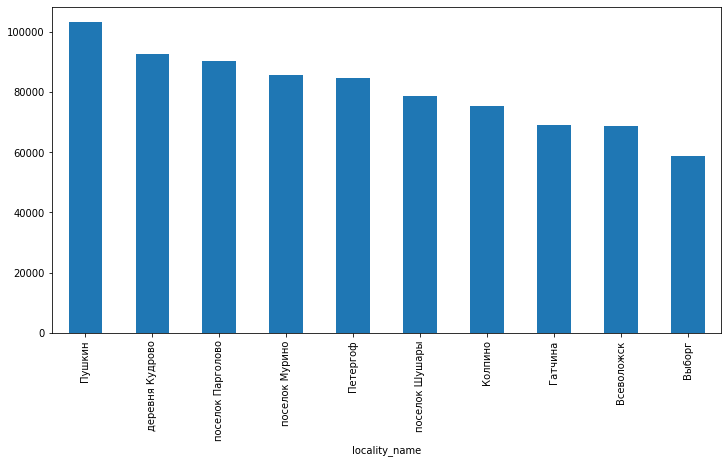

In [72]:
data_poselok['mean'].sort_values(ascending=False ).plot.bar(figsize=(12,6))

Самая дорогая недвижимость в Ленобласти в Пушкине 103 т.р. за кв.м., чуть дешевле в Кудрово 92 т.р. и Парголово 90 т.р., Петергоф 85 т.р.на пятом месте, 
Выборг на десятом 58 т.р., из-за значительного удаления от Санкт-петербурга

### Зависимость  стоимости объектов  от расстояния до центра Санкт-Петербурга.

In [73]:
#сделаем таблицу с данными по санкст-петербургу
data_spb=data[data['locality_name']=='Санкт-Петербург']
data_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mm_price,weekday,year,month,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,NaN,120370.0,3,2019,3,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558.0,92786.0,3,2015,8,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,84.0,3.0,234.0,424.0,408176.0,4,2015,7,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121.0,100000.0,1,2018,6,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,NaN,0.0,NaN,NaN,110545.0,3,2019,4,другой,12.0


In [74]:
#создадим таблицу сгрупированную по расстоянию от центра, усредняющую стоимость квадратного метра
spb_prise=data_spb.pivot_table(index='cityCenters_km', values='mm_price', aggfunc='mean')
spb_prise.head()

,mm_price
cityCenters_km,
0.0,245833.518519
1.0,177005.395833
2.0,157848.983871
3.0,121387.442857
4.0,133282.873547


<AxesSubplot:xlabel='cityCenters_km'>

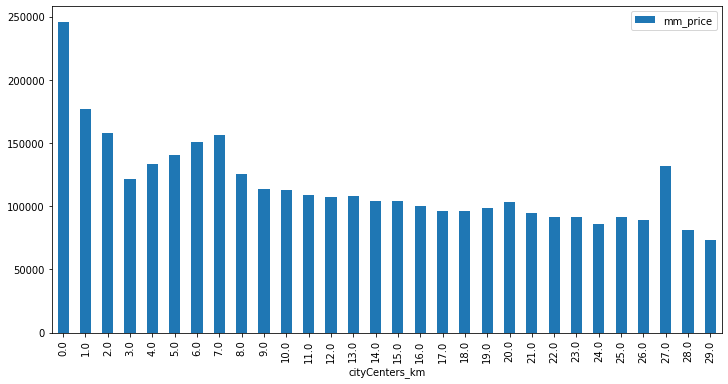

In [75]:
#построим график зависимости стоимости квадратного метра от расстояния до центра Петербурга 
spb_prise.plot.bar( figsize=(12,6))

Как и предполагалось самая дорогая недвижимость в центре Санкт-Петербурга (240 т.р. за кв.м.), при удалении от центра стоимсоть квадратного метра падает, на расстоянии 10 км - 110 т.р.за кв.м.. Но падение не является линейным, но графике есть два "горба" , один на растоянии 6-7 км от центра, другой на расстоянии 27 км. Горбы означают наличие более дорогих районов, расположенных дальше от центра,находящихся на соответствующем расстоянии. Падение цен в начале графика более крутое, после 8 км график падения уже имеет слабый наклон, цена меняется не так сильно как  при приближени к центру.  

## Общий вывод

    В нашей работе мы исследовали данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 
    а этапе предобработки данных мы сделали следующие важные вещи:
1. Исправили ошибочные занесения высоты потолка;
2. Поменяли  тип данных столбца 'first_day_exposition' на datetime64[ns];
3. Мы убрали дублирующие названия населенных пунктов;
4. Удалили из базы обьекты стоимостью менее 1 млн рублей.

    Мы  добавили  в таблицу новые столбцы со следующими параметрами:
    • цена одного квадратного метра;
    • день недели публикации объявления;
    • месяц публикации объявления;
    • год публикации объявления;
    • тип этажа квартиры (значения — «первый», «последний», «другой»);
    • расстояние до центра города в километрах .
    
    В результате исследовательского анализа данных было установленно следующее:
	Основная масса квартир находится в диапозоне от 30 до 90 квадратных метров. Средний метраж общей площади квартиры 60 кв.м. Медианное значение 52 кв.м. Первый квартиль 40 кв.м, третий-70 кв.м. 
	 Распределение цен квартир нормальное с  длинным хвостом на значениях от 9 до 50 млн. рублей.  Средняя цена квартиры в Петербурге 6.6 млн рублей. Медианное значение 4,7 млн. руб. 
	В Петербурге продается больше всего одно  и двухкомнатных квартир, около 8 тысяч. Ттрехкомнатных около 5,8 тысяч квартир.
	В Петербурге больше всего  5 этажных домов, около 5.8 тысяч. И много девятиэтажек, около 3.8 тысячи. 
 	В городе  большое количество парков рядом с домом, для 75% горожан парк расположен ближе 600 метров от их дома. 
    
    О скорости продаж недвижимости в Петербурге. 
    На рынке недвижимости Петербурга  четверть всех квартир продается за 45 дней, медианное время экспозиции 95 дней,75% всех квартир продаются за 232 дня. Быстрыми продажами можно назвать продажи за 1 месяц. Долгими продажами я бы назвал продажи свыше 8 месяцев. Необычно долгие -это продажи свыше двух лет. 
	
	О факторах влияющих на стоимость квартиры: 
    Как и предполагалось чем больше квартира тем больше она стоит, corr=0.63; коэффициент корреляции полной стоимости и жилой площади меньше, corr=0,57; также есть зависимость от размера кухни, corr=0,52 и количества комнат corr=0.36. Неочевидный факт что полная стоимость квартиры больше зависит от размера кухни, чем от количества комнат! 
Первый этаж самый дешевый, приблизительно на 10% дешевле последнего. Последний этаж дешевле 'другого' приблизительно на 15%. 
Зависимости полной цены объекта от дня недели, месяца и года публикации нет. 

	О рынке Ленобласти. 
    Самая дорогая недвижимость в Ленобласти в Пушкине 103 т.р. за кв.м., чуть дешевле в Кудрово 92 т.р. и Парголово 90 т.р., Петергоф 85 т.р.на пятом месте, Выборг на десятом 58 т.р., из-за значительного удаления от Санкт-петербурга.
	
    О зависимости цены за 1 кв.м. в Петербурге .
Как и предполагалось самая дорогая недвижимость в центре Санкт-Петербурга (240 т.р. за кв.м.), при удалении от центра стоимсоть квадратного метра падает, на расстоянии 10 км - 110 т.р.за кв.м., на расстоянии 28 км- 80 т.р.. 


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения там, где это возможно
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [х]  в каждом этапе есть промежуточные выводы
- [х]  есть общий вывод